In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
#NEED THIS TO RUN DEEP LEARNING
tf.config.set_visible_devices([], 'GPU')

In [3]:
# Training set with rules defined
training_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/HP/Documents/PYTHONCODES/DATASETS/FRUITS&VEGGIE/train/Vegetables',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
    
)

Found 1838 files belonging to 21 classes.


In [4]:
# Training set with rules defined
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/HP/Documents/PYTHONCODES/DATASETS/FRUITS&VEGGIE/validation/Vegetables',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
    
)

Found 205 files belonging to 21 classes.


In [5]:
# Training set with rules defined
test_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/HP/Documents/PYTHONCODES/DATASETS/FRUITS&VEGGIE/test/Vegetables',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 210 files belonging to 21 classes.


# CNN (BaseLine)

In [6]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.6))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
#Output Layer (Unit got 11 because got 11 classes in the dataset)
cnn.add(tf.keras.layers.Dense(units=21,activation='softmax'))


In [7]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0

In [9]:
# training using 10 epochs
training_history_vegetable = cnn.fit(x=training_set,validation_data=validation_set, epochs=10)

Epoch 1/10


2023-11-25 23:02:45.373042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 14s - loss: 385.8040 - accuracy: 0.0156     

2023-11-25 23:02:46.313732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/58 [======>.......................] - ETA: 15s - loss: 67.4810 - accuracy: 0.0625

2023-11-25 23:02:50.753345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/58 [========>.....................] - ETA: 14s - loss: 50.5669 - accuracy: 0.0724

2023-11-25 23:02:52.390022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-25 23:02:52.390623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 12s - loss: 37.8217 - accuracy: 0.0697

2023-11-25 23:02:55.372836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/58 [=============>................] - ETA: 11s - loss: 35.3573 - accuracy: 0.0692

2023-11-25 23:02:56.252245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 9s - loss: 30.4817 - accuracy: 0.0663 

2023-11-25 23:02:58.543859: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 7s - loss: 26.8838 - accuracy: 0.0592

2023-11-25 23:03:00.445443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 6s - loss: 25.1419 - accuracy: 0.0602

2023-11-25 23:03:01.716072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 4s - loss: 22.7401 - accuracy: 0.0632

2023-11-25 23:03:03.035717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



47/58 [=======================>......] - ETA: 4s - loss: 22.3222 - accuracy: 0.0625

2023-11-25 23:03:03.380323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/58 [========================>.....] - ETA: 3s - loss: 21.5390 - accuracy: 0.0619

2023-11-25 23:03:03.745927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 18.9645 - accuracy: 0.0637

2023-11-25 23:03:05.173303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 26s 374ms/step - loss: 18.9645 - accuracy: 0.0637 - val_loss: 5.2668 - val_accuracy: 0.0829
Epoch 2/10


2023-11-25 23:03:10.592559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 24s - loss: 5.0691 - accuracy: 0.0312     

2023-11-25 23:03:11.834215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/58 [======>.......................] - ETA: 18s - loss: 3.4476 - accuracy: 0.0521

2023-11-25 23:03:16.929538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/58 [========>.....................] - ETA: 16s - loss: 3.3686 - accuracy: 0.0592

2023-11-25 23:03:18.654779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-25 23:03:18.690281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 13s - loss: 3.2703 - accuracy: 0.0685

2023-11-25 23:03:21.576567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/58 [=============>................] - ETA: 12s - loss: 3.2580 - accuracy: 0.0770

2023-11-25 23:03:22.342415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 11s - loss: 3.2206 - accuracy: 0.0862

2023-11-25 23:03:25.349502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 9s - loss: 3.2091 - accuracy: 0.0872

2023-11-25 23:03:27.904275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 7s - loss: 3.1966 - accuracy: 0.0877

2023-11-25 23:03:29.721383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 5s - loss: 3.2814 - accuracy: 0.0863

2023-11-25 23:03:31.931796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



47/58 [=======================>......] - ETA: 5s - loss: 3.2820 - accuracy: 0.0864

2023-11-25 23:03:32.441691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/58 [========================>.....] - ETA: 4s - loss: 3.4593 - accuracy: 0.0861

2023-11-25 23:03:32.962065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 3.4196 - accuracy: 0.0832

2023-11-25 23:03:35.241446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 32s 490ms/step - loss: 3.4196 - accuracy: 0.0832 - val_loss: 2.8046 - val_accuracy: 0.1610
Epoch 3/10


2023-11-25 23:03:44.075173: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 24s - loss: 2.9449 - accuracy: 0.1562 

2023-11-25 23:03:45.583119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/58 [======>.......................] - ETA: 24s - loss: 3.5813 - accuracy: 0.1208

2023-11-25 23:03:52.746802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/58 [========>.....................] - ETA: 22s - loss: 4.6303 - accuracy: 0.1135

2023-11-25 23:03:54.997701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-25 23:03:55.001544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 19s - loss: 4.2320 - accuracy: 0.1070

2023-11-25 23:04:00.352852: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/58 [=============>................] - ETA: 18s - loss: 4.1345 - accuracy: 0.1049

2023-11-25 23:04:01.383427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 15s - loss: 3.9642 - accuracy: 0.1070

2023-11-25 23:04:05.192520: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 12s - loss: 3.8283 - accuracy: 0.1094

2023-11-25 23:04:07.985072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 10s - loss: 3.9502 - accuracy: 0.1075

2023-11-25 23:04:09.914680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 7s - loss: 4.1634 - accuracy: 0.1060

2023-11-25 23:04:12.390584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



47/58 [=======================>......] - ETA: 6s - loss: 4.1389 - accuracy: 0.1070

2023-11-25 23:04:13.086239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/58 [========================>.....] - ETA: 5s - loss: 4.0923 - accuracy: 0.1059

2023-11-25 23:04:13.744267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/58 [============================>.] - ETA: 0s - loss: 3.9403 - accuracy: 0.1042

2023-11-25 23:04:16.563388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 42s 638ms/step - loss: 3.9338 - accuracy: 0.1039 - val_loss: 2.7882 - val_accuracy: 0.2634
Epoch 4/10


2023-11-25 23:04:26.291932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 18s - loss: 2.8824 - accuracy: 0.0781 

2023-11-25 23:04:27.609473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/58 [======>.......................] - ETA: 22s - loss: 3.8737 - accuracy: 0.1071

2023-11-25 23:04:34.111709: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/58 [========>.....................] - ETA: 23s - loss: 3.6492 - accuracy: 0.1135

2023-11-25 23:04:37.672084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-25 23:04:37.691644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 18s - loss: 3.5547 - accuracy: 0.1178

2023-11-25 23:04:41.281077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/58 [=============>................] - ETA: 16s - loss: 3.5169 - accuracy: 0.1183

2023-11-25 23:04:42.103644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 14s - loss: 3.4806 - accuracy: 0.1174

2023-11-25 23:04:45.479729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 10s - loss: 3.3929 - accuracy: 0.1217

2023-11-25 23:04:47.407651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 9s - loss: 3.3481 - accuracy: 0.1250

2023-11-25 23:04:48.813658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 6s - loss: 3.3004 - accuracy: 0.1291

2023-11-25 23:04:50.898524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



47/58 [=======================>......] - ETA: 5s - loss: 3.2871 - accuracy: 0.1310

2023-11-25 23:04:51.342710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/58 [========================>.....] - ETA: 4s - loss: 3.3480 - accuracy: 0.1288

2023-11-25 23:04:51.875828: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/58 [============================>.] - ETA: 0s - loss: 3.3545 - accuracy: 0.1338

2023-11-25 23:04:53.765426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 36s 530ms/step - loss: 3.3448 - accuracy: 0.1355 - val_loss: 6.5233 - val_accuracy: 0.0976
Epoch 5/10


2023-11-25 23:05:03.616482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 29s - loss: 26.7287 - accuracy: 0.0469

2023-11-25 23:05:05.120445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/58 [======>.......................] - ETA: 26s - loss: 7.2483 - accuracy: 0.1167

2023-11-25 23:05:12.730187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/58 [========>.....................] - ETA: 25s - loss: 7.1065 - accuracy: 0.1181

2023-11-25 23:05:15.215365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-25 23:05:15.230364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 19s - loss: 5.7946 - accuracy: 0.1406

2023-11-25 23:05:19.451933: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/58 [=============>................] - ETA: 18s - loss: 5.5580 - accuracy: 0.1507

2023-11-25 23:05:20.748861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 15s - loss: 5.0948 - accuracy: 0.1676

2023-11-25 23:05:24.663987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 12s - loss: 4.7803 - accuracy: 0.1694

2023-11-25 23:05:27.807849: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 10s - loss: 4.6407 - accuracy: 0.1700

2023-11-25 23:05:29.744055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 7s - loss: 4.9002 - accuracy: 0.1658

2023-11-25 23:05:32.563423: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



47/58 [=======================>......] - ETA: 6s - loss: 4.8590 - accuracy: 0.1649

2023-11-25 23:05:33.232787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/58 [========================>.....] - ETA: 5s - loss: 4.7702 - accuracy: 0.1652

2023-11-25 23:05:33.707550: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 4.7477 - accuracy: 0.1752

2023-11-25 23:05:36.524887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 43s 640ms/step - loss: 4.7477 - accuracy: 0.1752 - val_loss: 26.5761 - val_accuracy: 0.0634
Epoch 6/10


2023-11-25 23:05:46.230056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 20s - loss: 12.5828 - accuracy: 0.1562 

2023-11-25 23:05:47.821645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/58 [======>.......................] - ETA: 25s - loss: 5.3059 - accuracy: 0.1719

2023-11-25 23:05:54.941827: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/58 [========>.....................] - ETA: 22s - loss: 4.6444 - accuracy: 0.1842

2023-11-25 23:05:57.459438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-25 23:05:57.470961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 19s - loss: 4.3088 - accuracy: 0.2091

2023-11-25 23:06:02.558426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/58 [=============>................] - ETA: 18s - loss: 4.1998 - accuracy: 0.2076

2023-11-25 23:06:03.445256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 15s - loss: 3.9475 - accuracy: 0.2150

2023-11-25 23:06:07.140236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 12s - loss: 3.7711 - accuracy: 0.2237

2023-11-25 23:06:10.549105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 10s - loss: 3.7323 - accuracy: 0.2203

2023-11-25 23:06:12.589244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/58 [======================>.......] - ETA: 8s - loss: 3.6215 - accuracy: 0.2236

2023-11-25 23:06:15.339316: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/58 [=======================>......] - ETA: 6s - loss: 3.5704 - accuracy: 0.2241

2023-11-25 23:06:16.127991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/58 [========================>.....] - ETA: 5s - loss: 3.5286 - accuracy: 0.2219

2023-11-25 23:06:16.614643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 3.4388 - accuracy: 0.2242

2023-11-25 23:06:19.117524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 42s 628ms/step - loss: 3.4388 - accuracy: 0.2242 - val_loss: 2.2381 - val_accuracy: 0.3610
Epoch 7/10


2023-11-25 23:06:27.480778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 15s - loss: 2.7627 - accuracy: 0.1875 

2023-11-25 23:06:28.724025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/58 [======>.......................] - ETA: 23s - loss: 2.7378 - accuracy: 0.2656

2023-11-25 23:06:35.677904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/58 [========>.....................] - ETA: 23s - loss: 3.4187 - accuracy: 0.2465

2023-11-25 23:06:38.038944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-25 23:06:38.053744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 16s - loss: 3.9582 - accuracy: 0.2344

2023-11-25 23:06:41.249438: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/58 [=============>................] - ETA: 15s - loss: 3.9194 - accuracy: 0.2400

2023-11-25 23:06:42.063268: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 12s - loss: 3.6858 - accuracy: 0.2509

2023-11-25 23:06:44.630883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 9s - loss: 3.4931 - accuracy: 0.2648 

2023-11-25 23:06:46.714934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 8s - loss: 3.4271 - accuracy: 0.2652

2023-11-25 23:06:47.885130: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 5s - loss: 3.3502 - accuracy: 0.2649

2023-11-25 23:06:49.653701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



47/58 [=======================>......] - ETA: 5s - loss: 3.3367 - accuracy: 0.2640

2023-11-25 23:06:50.325788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/58 [========================>.....] - ETA: 4s - loss: 3.2979 - accuracy: 0.2672

2023-11-25 23:06:50.907058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 3.9124 - accuracy: 0.2497

2023-11-25 23:06:53.509919: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 35s 518ms/step - loss: 3.9124 - accuracy: 0.2497 - val_loss: 3.6605 - val_accuracy: 0.2488
Epoch 8/10


2023-11-25 23:07:03.178306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 29s - loss: 3.6787 - accuracy: 0.1094     

2023-11-25 23:07:04.651380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/58 [======>.......................] - ETA: 24s - loss: 2.9073 - accuracy: 0.2679

2023-11-25 23:07:11.918515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/58 [========>.....................] - ETA: 24s - loss: 2.7482 - accuracy: 0.2882

2023-11-25 23:07:14.479604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-25 23:07:14.481335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 18s - loss: 2.6672 - accuracy: 0.3053

2023-11-25 23:07:18.555141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/58 [=============>................] - ETA: 17s - loss: 2.6357 - accuracy: 0.3080

2023-11-25 23:07:19.612226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 15s - loss: 2.6110 - accuracy: 0.3153

2023-11-25 23:07:23.735179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 12s - loss: 2.6021 - accuracy: 0.3166

2023-11-25 23:07:26.949057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 10s - loss: 2.5801 - accuracy: 0.3155

2023-11-25 23:07:29.333433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 7s - loss: 3.2244 - accuracy: 0.3084

2023-11-25 23:07:31.758392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



47/58 [=======================>......] - ETA: 6s - loss: 3.2111 - accuracy: 0.3059

2023-11-25 23:07:32.384872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/58 [========================>.....] - ETA: 5s - loss: 3.1728 - accuracy: 0.3061

2023-11-25 23:07:32.853981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 3.3765 - accuracy: 0.2998

2023-11-25 23:07:35.852027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 44s 654ms/step - loss: 3.3765 - accuracy: 0.2998 - val_loss: 3.6026 - val_accuracy: 0.3659
Epoch 9/10


2023-11-25 23:07:46.269667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 25s - loss: 4.1140 - accuracy: 0.3281 

2023-11-25 23:07:47.765272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/58 [======>.......................] - ETA: 28s - loss: 2.7784 - accuracy: 0.3460

2023-11-25 23:07:55.818756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/58 [========>.....................] - ETA: 26s - loss: 2.8278 - accuracy: 0.3403

2023-11-25 23:07:58.210745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-25 23:07:58.232408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 20s - loss: 3.4027 - accuracy: 0.3269

2023-11-25 23:08:02.520355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/58 [=============>................] - ETA: 18s - loss: 3.3091 - accuracy: 0.3359

2023-11-25 23:08:03.419551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 15s - loss: 3.1633 - accuracy: 0.3419

2023-11-25 23:08:07.097099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 12s - loss: 3.2964 - accuracy: 0.3355

2023-11-25 23:08:10.382815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 10s - loss: 3.2257 - accuracy: 0.3407

2023-11-25 23:08:12.397436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 7s - loss: 3.1143 - accuracy: 0.3404

2023-11-25 23:08:15.372555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



47/58 [=======================>......] - ETA: 6s - loss: 3.0927 - accuracy: 0.3418

2023-11-25 23:08:16.049203: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/58 [========================>.....] - ETA: 5s - loss: 3.0541 - accuracy: 0.3431

2023-11-25 23:08:16.568192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 3.0232 - accuracy: 0.3455

2023-11-25 23:08:18.867574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 42s 628ms/step - loss: 3.0232 - accuracy: 0.3455 - val_loss: 4.1309 - val_accuracy: 0.3073
Epoch 10/10


2023-11-25 23:08:27.690428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 24s - loss: 4.6725 - accuracy: 0.2344 

2023-11-25 23:08:28.875748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/58 [======>.......................] - ETA: 21s - loss: 2.7005 - accuracy: 0.3527

2023-11-25 23:08:34.767124: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


18/58 [========>.....................] - ETA: 19s - loss: 2.6315 - accuracy: 0.3594

2023-11-25 23:08:36.566195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-25 23:08:36.582456: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 14s - loss: 2.6581 - accuracy: 0.3474

2023-11-25 23:08:39.523662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/58 [=============>................] - ETA: 13s - loss: 2.5861 - accuracy: 0.3538

2023-11-25 23:08:40.464388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 12s - loss: 2.7616 - accuracy: 0.3598

2023-11-25 23:08:43.612463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 10s - loss: 2.6790 - accuracy: 0.3676

2023-11-25 23:08:46.766837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 8s - loss: 2.6565 - accuracy: 0.3674

2023-11-25 23:08:49.052036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 6s - loss: 2.6460 - accuracy: 0.3682

2023-11-25 23:08:51.570569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



47/58 [=======================>......] - ETA: 5s - loss: 2.6252 - accuracy: 0.3697

2023-11-25 23:08:52.230243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


49/58 [========================>.....] - ETA: 4s - loss: 2.5942 - accuracy: 0.3705

2023-11-25 23:08:52.811327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 2.5557 - accuracy: 0.3760

2023-11-25 23:08:55.639235: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



58/58 [==============================] - 38s 566ms/step - loss: 2.5557 - accuracy: 0.3760 - val_loss: 2.4001 - val_accuracy: 0.4293


In [15]:
training_history_vegetable.history #Return Dictionary of history

{'loss': [18.96445655822754,
  3.4195609092712402,
  3.9337551593780518,
  3.3448238372802734,
  4.747710227966309,
  3.438786506652832,
  3.912383556365967,
  3.3764500617980957,
  3.0232043266296387,
  2.555736541748047],
 'accuracy': [0.06365615129470825,
  0.08324265480041504,
  0.10391730070114136,
  0.1354733407497406,
  0.17519041895866394,
  0.2241566926240921,
  0.24972796440124512,
  0.2997823655605316,
  0.3454842269420624,
  0.3759521245956421],
 'val_loss': [5.266836643218994,
  2.8045525550842285,
  2.788213014602661,
  6.5232696533203125,
  26.576148986816406,
  2.2380709648132324,
  3.66048264503479,
  3.6026041507720947,
  4.13088321685791,
  2.4000768661499023],
 'val_accuracy': [0.08292683213949203,
  0.1609756052494049,
  0.2634146213531494,
  0.09756097197532654,
  0.06341463327407837,
  0.36097562313079834,
  0.2487804889678955,
  0.3658536672592163,
  0.3073170781135559,
  0.4292683005332947]}

In [16]:
#Recording History in json
import json
with open('training_hist_vegetable.json','w') as f:
  json.dump(training_history_vegetable.history,f)
     

# Accuracy Visualization

In [46]:
print("Train set Accuracy: {} %".format(training_history_vegetable.history['accuracy'][-1]*100))
print("Validation set Accuracy: {} %".format(training_history_vegetable.history['val_accuracy'][-1]*100))

Train set Accuracy: 37.59521245956421 %
Validation set Accuracy: 42.92683005332947 %


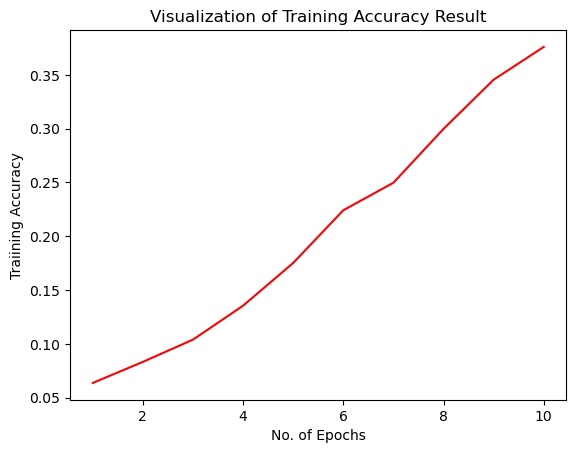

In [17]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history_vegetable.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()
     

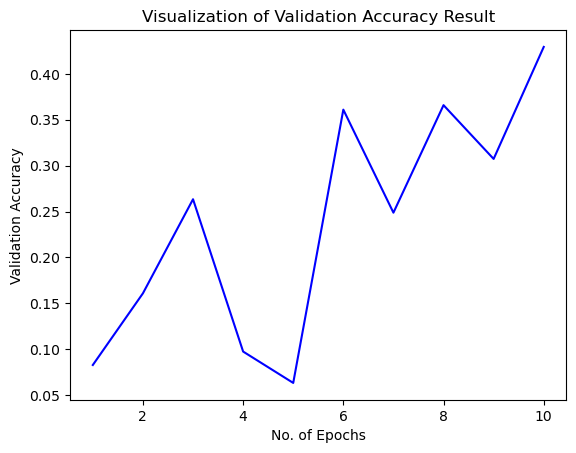

In [18]:
plt.plot(epochs,training_history_vegetable.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

# Model Accuracy Testing on Test Images

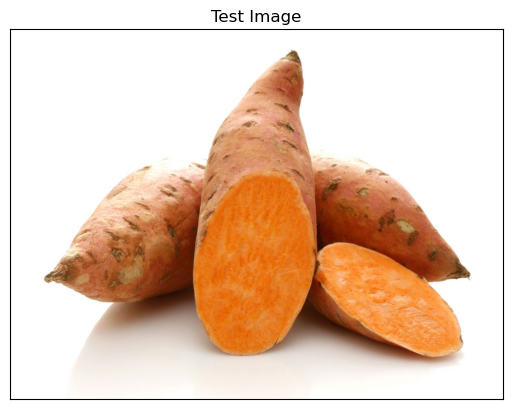

In [136]:
#Test Image Visualization
import cv2
image_path = '/Users/HP/Documents/IMGFORPRESENTATION/sweetpotatoes_getty2400-56a4975c5f9b58b7d0d7b790.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [137]:
# preprocess the image first the do the prediction
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 20ms/step


In [138]:
# basically the highest number is the predicted class
print(predictions)

[[0.05527442 0.04032984 0.0205404  0.01438406 0.10836229 0.06740214
  0.00970468 0.02170828 0.05913816 0.05092667 0.16076982 0.03508066
  0.07976514 0.02540493 0.02532669 0.09293292 0.01456493 0.00771122
  0.01092099 0.06043759 0.0393142 ]]


In [139]:
#the the prediction will convert into text output
result_index = np.argmax(predictions)
print("It's a {}".format(test_set.class_names[result_index]))

It's a ginger


# CNN Using ELU

In [210]:
#Another CNN using elu
cnn_elu = tf.keras.models.Sequential()
cnn_elu.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn_elu.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn_elu.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_elu.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn_elu.add(tf.keras.layers.Dropout(0.6))
cnn_elu.add(tf.keras.layers.Flatten())
cnn_elu.add(tf.keras.layers.Dense(units=128,activation='relu'))
#Output Layer (Unit got 11 because got 11 classes in the dataset)
cnn_elu.add(tf.keras.layers.Dense(units=21,activation='softmax'))

cnn_elu.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
cnn_elu.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 flatten_7 (Flatten)         (None, 12544)            

In [211]:
# training using 10 epochs
training_history_vegetable_elu = cnn_elu.fit(x=training_set,validation_data=validation_set, epochs=10)

Epoch 1/10


2023-11-27 03:21:41.274097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 8s - loss: 154.1782 - accuracy: 0.0469 

2023-11-27 03:21:41.821544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/58 [======>.......................] - ETA: 9s - loss: 29.6862 - accuracy: 0.0458

2023-11-27 03:21:44.453361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/58 [========>.....................] - ETA: 8s - loss: 24.1284 - accuracy: 0.0477

2023-11-27 03:21:45.323866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-27 03:21:45.333495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/58 [============>.................] - ETA: 6s - loss: 17.9685 - accuracy: 0.0498

2023-11-27 03:21:46.844890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



28/58 [=============>................] - ETA: 6s - loss: 17.4349 - accuracy: 0.0480

2023-11-27 03:21:47.261851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 5s - loss: 15.2736 - accuracy: 0.0587

2023-11-27 03:21:48.550148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 4s - loss: 13.4120 - accuracy: 0.0617

2023-11-27 03:21:49.558086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 3s - loss: 12.6736 - accuracy: 0.0632

2023-11-27 03:21:50.211608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 2s - loss: 11.8431 - accuracy: 0.0598

2023-11-27 03:21:51.106930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



47/58 [=======================>......] - ETA: 2s - loss: 11.6545 - accuracy: 0.0618

2023-11-27 03:21:51.417276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/58 [========================>.....] - ETA: 1s - loss: 11.1419 - accuracy: 0.0606

2023-11-27 03:21:51.675956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 10.1131 - accuracy: 0.0642

2023-11-27 03:21:52.559405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 15s 218ms/step - loss: 10.1131 - accuracy: 0.0642 - val_loss: 2.9330 - val_accuracy: 0.1317
Epoch 2/10


2023-11-27 03:21:55.860963: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 8s - loss: 3.0182 - accuracy: 0.0781  

2023-11-27 03:21:56.389135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/58 [======>.......................] - ETA: 8s - loss: 3.2904 - accuracy: 0.0771

2023-11-27 03:21:58.859606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/58 [========>.....................] - ETA: 7s - loss: 3.2367 - accuracy: 0.0822

2023-11-27 03:21:59.718247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-27 03:21:59.722668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/58 [============>.................] - ETA: 6s - loss: 3.1753 - accuracy: 0.0775

2023-11-27 03:22:01.112022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



28/58 [=============>................] - ETA: 6s - loss: 3.1648 - accuracy: 0.0815

2023-11-27 03:22:01.533045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 5s - loss: 3.2588 - accuracy: 0.0777

2023-11-27 03:22:02.803756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 3s - loss: 3.2345 - accuracy: 0.0841

2023-11-27 03:22:03.838684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 3s - loss: 3.2219 - accuracy: 0.0826

2023-11-27 03:22:04.489106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 2s - loss: 3.2068 - accuracy: 0.0808

2023-11-27 03:22:05.358702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/58 [=======================>......] - ETA: 2s - loss: 3.2007 - accuracy: 0.0814

2023-11-27 03:22:05.592842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/58 [========================>.....] - ETA: 1s - loss: 3.2237 - accuracy: 0.0831

2023-11-27 03:22:05.802009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 3.1970 - accuracy: 0.0849

2023-11-27 03:22:06.660037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 14s 210ms/step - loss: 3.1970 - accuracy: 0.0849 - val_loss: 13.3897 - val_accuracy: 0.0585
Epoch 3/10


2023-11-27 03:22:09.995166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 8s - loss: 7.5432 - accuracy: 0.0781   

2023-11-27 03:22:10.525695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/58 [======>.......................] - ETA: 8s - loss: 3.9172 - accuracy: 0.0917

2023-11-27 03:22:13.023786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/58 [========>.....................] - ETA: 7s - loss: 3.7239 - accuracy: 0.0987

2023-11-27 03:22:13.878503: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-27 03:22:13.889666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/58 [============>.................] - ETA: 6s - loss: 3.5385 - accuracy: 0.0938

2023-11-27 03:22:15.298429: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



28/58 [=============>................] - ETA: 6s - loss: 3.5114 - accuracy: 0.0960

2023-11-27 03:22:15.722690: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 5s - loss: 3.9477 - accuracy: 0.0938

2023-11-27 03:22:17.009980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 3s - loss: 4.8140 - accuracy: 0.0978

2023-11-27 03:22:18.005761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 3s - loss: 4.6730 - accuracy: 0.1019

2023-11-27 03:22:18.672553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 2s - loss: 4.5464 - accuracy: 0.1019

2023-11-27 03:22:19.551991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/58 [=======================>......] - ETA: 2s - loss: 4.4744 - accuracy: 0.1022

2023-11-27 03:22:19.793543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/58 [========================>.....] - ETA: 1s - loss: 4.4182 - accuracy: 0.1019

2023-11-27 03:22:20.023214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 4.2197 - accuracy: 0.1121

2023-11-27 03:22:20.895656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 14s 212ms/step - loss: 4.2197 - accuracy: 0.1121 - val_loss: 2.7396 - val_accuracy: 0.1805
Epoch 4/10


2023-11-27 03:22:24.241534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 8s - loss: 2.9377 - accuracy: 0.0625  

2023-11-27 03:22:24.758383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/58 [======>.......................] - ETA: 8s - loss: 6.3569 - accuracy: 0.1000

2023-11-27 03:22:27.235238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/58 [========>.....................] - ETA: 7s - loss: 5.6525 - accuracy: 0.1151

2023-11-27 03:22:28.099691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-27 03:22:28.108296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/58 [============>.................] - ETA: 6s - loss: 5.4895 - accuracy: 0.1238

2023-11-27 03:22:29.484261: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



28/58 [=============>................] - ETA: 6s - loss: 5.3847 - accuracy: 0.1250

2023-11-27 03:22:29.911387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 5s - loss: 5.0274 - accuracy: 0.1288

2023-11-27 03:22:31.218835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 3s - loss: 4.7029 - accuracy: 0.1370

2023-11-27 03:22:32.229737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 3s - loss: 4.6436 - accuracy: 0.1362

2023-11-27 03:22:32.896140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 2s - loss: 4.4795 - accuracy: 0.1406

2023-11-27 03:22:33.785435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/58 [=======================>......] - ETA: 2s - loss: 4.4209 - accuracy: 0.1432

2023-11-27 03:22:34.020038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/58 [========================>.....] - ETA: 1s - loss: 4.3561 - accuracy: 0.1431

2023-11-27 03:22:34.237311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 4.1530 - accuracy: 0.1491

2023-11-27 03:22:35.099575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 14s 211ms/step - loss: 4.1530 - accuracy: 0.1491 - val_loss: 2.3298 - val_accuracy: 0.3463
Epoch 5/10


2023-11-27 03:22:38.443272: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 8s - loss: 2.6944 - accuracy: 0.1875  

2023-11-27 03:22:38.968375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/58 [======>.......................] - ETA: 9s - loss: 9.2422 - accuracy: 0.1396

2023-11-27 03:22:41.696613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/58 [========>.....................] - ETA: 8s - loss: 7.9121 - accuracy: 0.1497

2023-11-27 03:22:42.606620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-27 03:22:42.606846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/58 [============>.................] - ETA: 6s - loss: 6.3689 - accuracy: 0.1736

2023-11-27 03:22:44.035666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



28/58 [=============>................] - ETA: 6s - loss: 6.2276 - accuracy: 0.1775

2023-11-27 03:22:44.463036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 5s - loss: 5.6644 - accuracy: 0.1875

2023-11-27 03:22:45.796812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 4s - loss: 5.1859 - accuracy: 0.1931

2023-11-27 03:22:46.976870: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 3s - loss: 5.0062 - accuracy: 0.1942

2023-11-27 03:22:47.658804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 2s - loss: 4.8374 - accuracy: 0.1990

2023-11-27 03:22:48.610199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



47/58 [=======================>......] - ETA: 2s - loss: 4.7898 - accuracy: 0.1995

2023-11-27 03:22:48.904150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/58 [========================>.....] - ETA: 1s - loss: 5.5060 - accuracy: 0.1944

2023-11-27 03:22:49.155625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 5.3032 - accuracy: 0.1926

2023-11-27 03:22:50.022999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 15s 225ms/step - loss: 5.3032 - accuracy: 0.1926 - val_loss: 2.3323 - val_accuracy: 0.2976
Epoch 6/10


2023-11-27 03:22:53.419676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 8s - loss: 2.6454 - accuracy: 0.2344  

2023-11-27 03:22:53.948891: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/58 [======>.......................] - ETA: 8s - loss: 3.6731 - accuracy: 0.2271

2023-11-27 03:22:56.527948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/58 [========>.....................] - ETA: 8s - loss: 3.4066 - accuracy: 0.2352

2023-11-27 03:22:57.371324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-27 03:22:57.378528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/58 [============>.................] - ETA: 6s - loss: 3.1424 - accuracy: 0.2465

2023-11-27 03:22:58.765728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



28/58 [=============>................] - ETA: 6s - loss: 3.1093 - accuracy: 0.2500

2023-11-27 03:22:59.187994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 5s - loss: 3.1324 - accuracy: 0.2519

2023-11-27 03:23:00.470917: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 3s - loss: 3.0772 - accuracy: 0.2468

2023-11-27 03:23:01.500030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 3s - loss: 3.0407 - accuracy: 0.2455

2023-11-27 03:23:02.165056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 2s - loss: 3.0979 - accuracy: 0.2480

2023-11-27 03:23:03.066394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/58 [=======================>......] - ETA: 2s - loss: 3.1433 - accuracy: 0.2480

2023-11-27 03:23:03.302338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



49/58 [========================>.....] - ETA: 1s - loss: 3.1254 - accuracy: 0.2500

2023-11-27 03:23:03.527881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 3.0229 - accuracy: 0.2514

2023-11-27 03:23:04.462845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 14s 214ms/step - loss: 3.0229 - accuracy: 0.2514 - val_loss: 3.0763 - val_accuracy: 0.3415
Epoch 7/10


2023-11-27 03:23:07.785271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 7s - loss: 2.9849 - accuracy: 0.2188  

2023-11-27 03:23:08.303741: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/58 [======>.......................] - ETA: 8s - loss: 2.5734 - accuracy: 0.2833

2023-11-27 03:23:10.820633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/58 [========>.....................] - ETA: 8s - loss: 2.5303 - accuracy: 0.3010

2023-11-27 03:23:11.744058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-27 03:23:11.752855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/58 [============>.................] - ETA: 6s - loss: 3.4555 - accuracy: 0.2847

2023-11-27 03:23:13.183882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



28/58 [=============>................] - ETA: 6s - loss: 3.5816 - accuracy: 0.2835

2023-11-27 03:23:13.614207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 5s - loss: 4.3267 - accuracy: 0.2652

2023-11-27 03:23:14.917808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 4s - loss: 4.1059 - accuracy: 0.2628

2023-11-27 03:23:16.004559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 3s - loss: 3.9637 - accuracy: 0.2746

2023-11-27 03:23:16.700657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 2s - loss: 3.8148 - accuracy: 0.2853

2023-11-27 03:23:17.617720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



47/58 [=======================>......] - ETA: 2s - loss: 3.7773 - accuracy: 0.2866

2023-11-27 03:23:17.864571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/58 [========================>.....] - ETA: 1s - loss: 3.6993 - accuracy: 0.2856

2023-11-27 03:23:18.102586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 3.5244 - accuracy: 0.2867

2023-11-27 03:23:18.987721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 15s 217ms/step - loss: 3.5244 - accuracy: 0.2867 - val_loss: 2.4902 - val_accuracy: 0.4146
Epoch 8/10


2023-11-27 03:23:22.355414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 8s - loss: 2.2679 - accuracy: 0.3125  

2023-11-27 03:23:22.883127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/58 [======>.......................] - ETA: 8s - loss: 4.1000 - accuracy: 0.3146

2023-11-27 03:23:25.466703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/58 [========>.....................] - ETA: 8s - loss: 3.7555 - accuracy: 0.3339

2023-11-27 03:23:26.352818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-27 03:23:26.362746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/58 [============>.................] - ETA: 6s - loss: 4.2611 - accuracy: 0.3310

2023-11-27 03:23:27.917721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



28/58 [=============>................] - ETA: 6s - loss: 4.2544 - accuracy: 0.3259

2023-11-27 03:23:28.352941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 5s - loss: 3.9864 - accuracy: 0.3220

2023-11-27 03:23:29.660890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 4s - loss: 3.6902 - accuracy: 0.3341

2023-11-27 03:23:30.725229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 3s - loss: 3.6028 - accuracy: 0.3326

2023-11-27 03:23:31.425354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 2s - loss: 3.4713 - accuracy: 0.3383

2023-11-27 03:23:32.347795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/58 [=======================>......] - ETA: 2s - loss: 3.4166 - accuracy: 0.3431

2023-11-27 03:23:32.617816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/58 [========================>.....] - ETA: 1s - loss: 3.3887 - accuracy: 0.3438

2023-11-27 03:23:32.839927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/58 [============================>.] - ETA: 0s - loss: 3.2295 - accuracy: 0.3509

2023-11-27 03:23:33.752356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 15s 221ms/step - loss: 3.2171 - accuracy: 0.3520 - val_loss: 1.4489 - val_accuracy: 0.7220
Epoch 9/10


2023-11-27 03:23:37.141116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 8s - loss: 2.0362 - accuracy: 0.3438  

2023-11-27 03:23:37.680633: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/58 [======>.......................] - ETA: 8s - loss: 2.5780 - accuracy: 0.3771

2023-11-27 03:23:40.268696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/58 [========>.....................] - ETA: 8s - loss: 5.4298 - accuracy: 0.3109

2023-11-27 03:23:41.151624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-27 03:23:41.163290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/58 [============>.................] - ETA: 6s - loss: 6.4117 - accuracy: 0.2523

2023-11-27 03:23:42.610957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



28/58 [=============>................] - ETA: 6s - loss: 6.2739 - accuracy: 0.2533

2023-11-27 03:23:43.052689: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 5s - loss: 5.6635 - accuracy: 0.2661

2023-11-27 03:23:44.453835: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 4s - loss: 5.1834 - accuracy: 0.2740

2023-11-27 03:23:45.540551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 3s - loss: 4.9490 - accuracy: 0.2842

2023-11-27 03:23:46.243875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 2s - loss: 4.7319 - accuracy: 0.2955

2023-11-27 03:23:47.186358: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/58 [=======================>......] - ETA: 2s - loss: 4.6879 - accuracy: 0.2995

2023-11-27 03:23:47.448460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/58 [========================>.....] - ETA: 1s - loss: 4.5795 - accuracy: 0.3019

2023-11-27 03:23:47.690087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 4.3248 - accuracy: 0.3118

2023-11-27 03:23:48.610808: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 15s 223ms/step - loss: 4.3248 - accuracy: 0.3118 - val_loss: 6.9486 - val_accuracy: 0.1415
Epoch 10/10


2023-11-27 03:23:52.037663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 8s - loss: 8.0300 - accuracy: 0.1406  

2023-11-27 03:23:52.582747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/58 [======>.......................] - ETA: 9s - loss: 3.9226 - accuracy: 0.2104

2023-11-27 03:23:55.219376: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


19/58 [========>.....................] - ETA: 8s - loss: 3.6149 - accuracy: 0.2368

2023-11-27 03:23:56.112228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-27 03:23:56.122894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/58 [============>.................] - ETA: 6s - loss: 3.1611 - accuracy: 0.2951

2023-11-27 03:23:57.610795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



28/58 [=============>................] - ETA: 6s - loss: 3.1462 - accuracy: 0.3002

2023-11-27 03:23:58.053360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


33/58 [================>.............] - ETA: 5s - loss: 3.0392 - accuracy: 0.3182

2023-11-27 03:23:59.443785: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 4s - loss: 2.8762 - accuracy: 0.3389

2023-11-27 03:24:00.643276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 3s - loss: 2.8052 - accuracy: 0.3467

2023-11-27 03:24:01.371765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/58 [======================>.......] - ETA: 2s - loss: 2.7545 - accuracy: 0.3499

2023-11-27 03:24:02.328632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/58 [=======================>......] - ETA: 2s - loss: 2.7254 - accuracy: 0.3555

2023-11-27 03:24:02.599161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


50/58 [========================>.....] - ETA: 1s - loss: 2.6802 - accuracy: 0.3613

2023-11-27 03:24:02.840855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/58 [============================>.] - ETA: 0s - loss: 2.5438 - accuracy: 0.3799

2023-11-27 03:24:03.757349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



58/58 [==============================] - 15s 227ms/step - loss: 2.5360 - accuracy: 0.3819 - val_loss: 1.2384 - val_accuracy: 0.6439


In [212]:
print("Train set Accuracy: {} %".format(training_history_vegetable_elu.history['accuracy'][-1]*100))
print("Validation set Accuracy: {} %".format(training_history_vegetable_elu.history['val_accuracy'][-1]*100))

Train set Accuracy: 38.19368779659271 %
Validation set Accuracy: 64.39024209976196 %


# Optimization on CNN Model

In [87]:
# Adding more layers and change the activation into elu since elu does not convert negative value to 0
cnn1 = tf.keras.models.Sequential()
cnn1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='elu',input_shape=[64,64,3]))
cnn1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='elu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='elu'))
cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='elu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Flatten())
     
cnn1.add(tf.keras.layers.Dense(units=512,activation='elu'))
cnn1.add(tf.keras.layers.Dense(units=256,activation='elu'))

cnn1.add(tf.keras.layers.Dropout(0.25)) #To avoid overfitting
     
#Output Layer
cnn1.add(tf.keras.layers.Dense(units=21,activation='softmax'))

In [88]:
cnn1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_25 (Conv2D)          (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 31, 31, 32)        18464     
                                                                 
 conv2d_27 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                

In [89]:
# now using 32 epochs 
training_history_vegetable1 = cnn1.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32


2023-11-26 19:29:11.219752: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:25 - loss: 31.2854 - accuracy: 0.0312

2023-11-26 19:29:12.127865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 19s - loss: 21.8582 - accuracy: 0.0433

2023-11-26 19:29:16.975900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 18s - loss: 18.2999 - accuracy: 0.0423

2023-11-26 19:29:19.136702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:29:19.149510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/58 [==========>...................] - ETA: 17s - loss: 15.1678 - accuracy: 0.0497

2023-11-26 19:29:22.438732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 16s - loss: 14.2436 - accuracy: 0.0495

2023-11-26 19:29:23.629345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/58 [==============>...............] - ETA: 14s - loss: 12.1319 - accuracy: 0.0500

2023-11-26 19:29:26.881036: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/58 [================>.............] - ETA: 12s - loss: 11.1201 - accuracy: 0.0487

2023-11-26 19:29:28.925623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/58 [==================>...........] - ETA: 10s - loss: 10.4815 - accuracy: 0.0524

2023-11-26 19:29:29.980222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 8s - loss: 9.7883 - accuracy: 0.0526

2023-11-26 19:29:31.996125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 7s - loss: 9.4739 - accuracy: 0.0560

2023-11-26 19:29:32.846347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 6s - loss: 9.3312 - accuracy: 0.0575

2023-11-26 19:29:33.545450: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 7.8920 - accuracy: 0.0724

2023-11-26 19:29:38.803314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 33s 524ms/step - loss: 7.8920 - accuracy: 0.0724 - val_loss: 2.4888 - val_accuracy: 0.2585
Epoch 2/32


2023-11-26 19:29:44.633442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:33 - loss: 3.1782 - accuracy: 0.0938

2023-11-26 19:29:45.837207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 23s - loss: 2.9625 - accuracy: 0.1346

2023-11-26 19:29:51.727589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 20s - loss: 2.9205 - accuracy: 0.1544

2023-11-26 19:29:53.630227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:29:53.637392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/58 [==========>...................] - ETA: 18s - loss: 2.9509 - accuracy: 0.1449

2023-11-26 19:29:56.643436: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 17s - loss: 2.9447 - accuracy: 0.1445

2023-11-26 19:29:57.624669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/58 [==============>...............] - ETA: 13s - loss: 2.9169 - accuracy: 0.1490

2023-11-26 19:30:00.019046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/58 [================>.............] - ETA: 12s - loss: 2.9041 - accuracy: 0.1572

2023-11-26 19:30:02.531364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/58 [==================>...........] - ETA: 10s - loss: 2.8921 - accuracy: 0.1630

2023-11-26 19:30:04.480940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 8s - loss: 2.8658 - accuracy: 0.1639

2023-11-26 19:30:06.208284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 7s - loss: 2.8554 - accuracy: 0.1672

2023-11-26 19:30:07.039451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 7s - loss: 2.8444 - accuracy: 0.1676

2023-11-26 19:30:07.886015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 2.7587 - accuracy: 0.1817

2023-11-26 19:30:14.373777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 36s 561ms/step - loss: 2.7587 - accuracy: 0.1817 - val_loss: 1.8698 - val_accuracy: 0.4390
Epoch 3/32


2023-11-26 19:30:20.743055: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:47 - loss: 2.7328 - accuracy: 0.2812

2023-11-26 19:30:21.971200: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/58 [=====>........................] - ETA: 25s - loss: 2.2253 - accuracy: 0.3385

2023-11-26 19:30:27.861923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 22s - loss: 2.2379 - accuracy: 0.3511

2023-11-26 19:30:30.346992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:30:30.361280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/58 [==========>...................] - ETA: 19s - loss: 2.2430 - accuracy: 0.3395

2023-11-26 19:30:33.160434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 18s - loss: 2.2416 - accuracy: 0.3307

2023-11-26 19:30:34.155923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 14s - loss: 2.2356 - accuracy: 0.3216

2023-11-26 19:30:37.442224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 12s - loss: 2.2449 - accuracy: 0.3187

2023-11-26 19:30:40.138880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 10s - loss: 2.2508 - accuracy: 0.3183

2023-11-26 19:30:41.621174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 7s - loss: 2.2096 - accuracy: 0.3256

2023-11-26 19:30:43.738524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:30:44.282759: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/58 [======================>.......] - ETA: 6s - loss: 2.2147 - accuracy: 0.3257

2023-11-26 19:30:44.788573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 2.2204 - accuracy: 0.3215

2023-11-26 19:30:50.441901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 36s 557ms/step - loss: 2.2204 - accuracy: 0.3215 - val_loss: 1.3204 - val_accuracy: 0.6098
Epoch 4/32


2023-11-26 19:30:56.460441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:47 - loss: 1.5415 - accuracy: 0.5625

2023-11-26 19:30:57.518595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 20s - loss: 1.8544 - accuracy: 0.4135

2023-11-26 19:31:02.815610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 18s - loss: 1.8572 - accuracy: 0.4136

2023-11-26 19:31:04.636773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:31:04.646359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/58 [==========>...................] - ETA: 16s - loss: 1.8117 - accuracy: 0.4253

2023-11-26 19:31:07.576945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/58 [===========>..................] - ETA: 15s - loss: 1.7991 - accuracy: 0.4288

2023-11-26 19:31:08.767743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 13s - loss: 1.7951 - accuracy: 0.4355

2023-11-26 19:31:12.454446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/58 [=================>............] - ETA: 11s - loss: 1.7807 - accuracy: 0.4462

2023-11-26 19:31:15.144221: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 9s - loss: 1.7957 - accuracy: 0.4423 

2023-11-26 19:31:17.397233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 7s - loss: 1.8174 - accuracy: 0.4433

2023-11-26 19:31:19.358498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 7s - loss: 1.8112 - accuracy: 0.4460

2023-11-26 19:31:19.871362: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



45/58 [======================>.......] - ETA: 6s - loss: 1.8006 - accuracy: 0.4493

2023-11-26 19:31:20.204432: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 1.7720 - accuracy: 0.4527

2023-11-26 19:31:25.265119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 35s 548ms/step - loss: 1.7720 - accuracy: 0.4527 - val_loss: 0.8260 - val_accuracy: 0.7220
Epoch 5/32


2023-11-26 19:31:31.572127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:38 - loss: 2.3242 - accuracy: 0.3750

2023-11-26 19:31:32.836920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 22s - loss: 1.5354 - accuracy: 0.5312

2023-11-26 19:31:38.326409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 20s - loss: 1.4761 - accuracy: 0.5496

2023-11-26 19:31:40.357537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:31:40.375701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/58 [==========>...................] - ETA: 18s - loss: 1.4859 - accuracy: 0.5312

2023-11-26 19:31:43.514279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 17s - loss: 1.4384 - accuracy: 0.5456

2023-11-26 19:31:44.463943: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/58 [==============>...............] - ETA: 14s - loss: 1.4096 - accuracy: 0.5583

2023-11-26 19:31:47.083065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 11s - loss: 1.3866 - accuracy: 0.5705

2023-11-26 19:31:49.626518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 10s - loss: 1.3863 - accuracy: 0.5715

2023-11-26 19:31:51.115107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 7s - loss: 1.3704 - accuracy: 0.5744

2023-11-26 19:31:52.836257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



43/58 [=====================>........] - ETA: 7s - loss: 1.3721 - accuracy: 0.5756

2023-11-26 19:31:53.320217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 6s - loss: 1.3800 - accuracy: 0.5710

2023-11-26 19:31:53.995978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 1.3724 - accuracy: 0.5729

2023-11-26 19:32:00.103038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 35s 550ms/step - loss: 1.3724 - accuracy: 0.5729 - val_loss: 0.6496 - val_accuracy: 0.8146
Epoch 6/32


2023-11-26 19:32:07.386116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 20s - loss: 0.9974 - accuracy: 0.6719 

2023-11-26 19:32:08.440139: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/58 [=====>........................] - ETA: 23s - loss: 0.8337 - accuracy: 0.7396

2023-11-26 19:32:14.098290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 21s - loss: 0.7977 - accuracy: 0.7408

2023-11-26 19:32:16.733478: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:32:16.743382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/58 [==========>...................] - ETA: 19s - loss: 0.8028 - accuracy: 0.7372

2023-11-26 19:32:20.198176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 18s - loss: 0.8294 - accuracy: 0.7240

2023-11-26 19:32:21.038431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 14s - loss: 0.8748 - accuracy: 0.7117

2023-11-26 19:32:24.523885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 12s - loss: 0.8778 - accuracy: 0.7071

2023-11-26 19:32:26.887788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 10s - loss: 0.8992 - accuracy: 0.7019

2023-11-26 19:32:28.480766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 7s - loss: 0.9008 - accuracy: 0.7006

2023-11-26 19:32:30.441390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:32:30.868287: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/58 [======================>.......] - ETA: 6s - loss: 0.8972 - accuracy: 0.7021

2023-11-26 19:32:31.691592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.8677 - accuracy: 0.7127

2023-11-26 19:32:37.715951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 38s 580ms/step - loss: 0.8677 - accuracy: 0.7127 - val_loss: 0.4065 - val_accuracy: 0.8878
Epoch 7/32


2023-11-26 19:32:44.477801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:44 - loss: 0.7806 - accuracy: 0.6875

2023-11-26 19:32:45.443100: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 22s - loss: 0.6835 - accuracy: 0.7476

2023-11-26 19:32:51.323604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 19s - loss: 0.6669 - accuracy: 0.7574

2023-11-26 19:32:52.890087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:32:52.901469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/58 [==========>...................] - ETA: 17s - loss: 0.6748 - accuracy: 0.7557

2023-11-26 19:32:55.592623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/58 [===========>..................] - ETA: 15s - loss: 0.6809 - accuracy: 0.7588

2023-11-26 19:32:56.640993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/58 [===============>..............] - ETA: 12s - loss: 0.6879 - accuracy: 0.7607

2023-11-26 19:33:00.185810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/58 [=================>............] - ETA: 10s - loss: 0.6824 - accuracy: 0.7648

2023-11-26 19:33:02.806981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/58 [===================>..........] - ETA: 9s - loss: 0.6628 - accuracy: 0.7711

2023-11-26 19:33:04.938736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 7s - loss: 0.6564 - accuracy: 0.7754

2023-11-26 19:33:07.308804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 7s - loss: 0.6513 - accuracy: 0.7763

2023-11-26 19:33:07.909560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



45/58 [======================>.......] - ETA: 6s - loss: 0.6584 - accuracy: 0.7743

2023-11-26 19:33:08.516348: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.6183 - accuracy: 0.7884

2023-11-26 19:33:14.958710: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 37s 583ms/step - loss: 0.6183 - accuracy: 0.7884 - val_loss: 0.2914 - val_accuracy: 0.9268
Epoch 8/32


2023-11-26 19:33:21.487571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 30s - loss: 0.4591 - accuracy: 0.8281 

2023-11-26 19:33:22.969071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 23s - loss: 0.5164 - accuracy: 0.8221

2023-11-26 19:33:28.813653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 21s - loss: 0.4803 - accuracy: 0.8309

2023-11-26 19:33:31.050549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:33:31.065385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/58 [==========>...................] - ETA: 18s - loss: 0.4526 - accuracy: 0.8438

2023-11-26 19:33:33.471279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/58 [===========>..................] - ETA: 17s - loss: 0.4642 - accuracy: 0.8450

2023-11-26 19:33:34.925910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 13s - loss: 0.4586 - accuracy: 0.8468

2023-11-26 19:33:38.267999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/58 [=================>............] - ETA: 11s - loss: 0.4591 - accuracy: 0.8420

2023-11-26 19:33:41.095756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 10s - loss: 0.4609 - accuracy: 0.8421

2023-11-26 19:33:42.803037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 7s - loss: 0.4743 - accuracy: 0.8394

2023-11-26 19:33:44.573133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 7s - loss: 0.4761 - accuracy: 0.8388

2023-11-26 19:33:45.369421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



45/58 [======================>.......] - ETA: 6s - loss: 0.4829 - accuracy: 0.8375

2023-11-26 19:33:46.062047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.4487 - accuracy: 0.8515

2023-11-26 19:33:51.511216: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 37s 572ms/step - loss: 0.4487 - accuracy: 0.8515 - val_loss: 0.2592 - val_accuracy: 0.9366
Epoch 9/32


2023-11-26 19:33:58.356367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:44 - loss: 0.1605 - accuracy: 0.9688

2023-11-26 19:33:59.361670: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 26s - loss: 0.2272 - accuracy: 0.9375

2023-11-26 19:34:05.967861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/58 [=======>......................] - ETA: 23s - loss: 0.2632 - accuracy: 0.9277

2023-11-26 19:34:07.754826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:34:07.773404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/58 [==========>...................] - ETA: 19s - loss: 0.2559 - accuracy: 0.9226

2023-11-26 19:34:11.173955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



24/58 [===========>..................] - ETA: 18s - loss: 0.2586 - accuracy: 0.9219

2023-11-26 19:34:12.080084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/58 [==============>...............] - ETA: 15s - loss: 0.3015 - accuracy: 0.9167

2023-11-26 19:34:14.796284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/58 [================>.............] - ETA: 13s - loss: 0.3141 - accuracy: 0.9099

2023-11-26 19:34:17.344212: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/58 [==================>...........] - ETA: 11s - loss: 0.3256 - accuracy: 0.9046

2023-11-26 19:34:18.753270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 8s - loss: 0.3208 - accuracy: 0.9048

2023-11-26 19:34:21.110881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



43/58 [=====================>........] - ETA: 8s - loss: 0.3296 - accuracy: 0.9019

2023-11-26 19:34:21.863902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 7s - loss: 0.3253 - accuracy: 0.9027

2023-11-26 19:34:22.457470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.3399 - accuracy: 0.8993

2023-11-26 19:34:28.609532: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 37s 584ms/step - loss: 0.3399 - accuracy: 0.8993 - val_loss: 0.2369 - val_accuracy: 0.9415
Epoch 10/32


2023-11-26 19:34:35.479179: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:48 - loss: 0.5648 - accuracy: 0.8125

2023-11-26 19:34:36.565401: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 24s - loss: 0.2909 - accuracy: 0.9087

2023-11-26 19:34:43.208310: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 21s - loss: 0.3597 - accuracy: 0.9081

2023-11-26 19:34:45.025300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:34:45.025541: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 18s - loss: 0.3202 - accuracy: 0.9167

2023-11-26 19:34:48.661932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 16s - loss: 0.3203 - accuracy: 0.9135

2023-11-26 19:34:49.650883: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/58 [===============>..............] - ETA: 13s - loss: 0.3061 - accuracy: 0.9121

2023-11-26 19:34:52.213737: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/58 [=================>............] - ETA: 11s - loss: 0.3048 - accuracy: 0.9115

2023-11-26 19:34:54.485695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


40/58 [===================>..........] - ETA: 9s - loss: 0.2875 - accuracy: 0.9141

2023-11-26 19:34:56.170964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 7s - loss: 0.2910 - accuracy: 0.9142

2023-11-26 19:34:57.964518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 7s - loss: 0.2911 - accuracy: 0.9126

2023-11-26 19:34:58.309112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



45/58 [======================>.......] - ETA: 6s - loss: 0.2870 - accuracy: 0.9132

2023-11-26 19:34:58.745271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.2872 - accuracy: 0.9124

2023-11-26 19:35:05.531338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 36s 566ms/step - loss: 0.2872 - accuracy: 0.9124 - val_loss: 0.2106 - val_accuracy: 0.9512
Epoch 11/32


2023-11-26 19:35:11.831387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:37 - loss: 0.1404 - accuracy: 0.9688

2023-11-26 19:35:12.625383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/58 [=====>........................] - ETA: 23s - loss: 0.2263 - accuracy: 0.9401

2023-11-26 19:35:18.303924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/58 [=======>......................] - ETA: 20s - loss: 0.1924 - accuracy: 0.9473

2023-11-26 19:35:19.919340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:35:19.935317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/58 [==========>...................] - ETA: 18s - loss: 0.1628 - accuracy: 0.9524

2023-11-26 19:35:23.790842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/58 [===========>..................] - ETA: 17s - loss: 0.1627 - accuracy: 0.9525

2023-11-26 19:35:25.103850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 13s - loss: 0.1912 - accuracy: 0.9496

2023-11-26 19:35:27.650119: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/58 [==================>...........] - ETA: 10s - loss: 0.1814 - accuracy: 0.9502

2023-11-26 19:35:31.106186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 9s - loss: 0.1881 - accuracy: 0.9495 

2023-11-26 19:35:32.172428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 7s - loss: 0.1896 - accuracy: 0.9477

2023-11-26 19:35:34.338042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 7s - loss: 0.1871 - accuracy: 0.9489

2023-11-26 19:35:34.828375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



45/58 [======================>.......] - ETA: 6s - loss: 0.1890 - accuracy: 0.9479

2023-11-26 19:35:35.181867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.1881 - accuracy: 0.9472

2023-11-26 19:35:40.454579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 35s 539ms/step - loss: 0.1881 - accuracy: 0.9472 - val_loss: 0.2295 - val_accuracy: 0.9415
Epoch 12/32


2023-11-26 19:35:46.538121: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:56 - loss: 0.3239 - accuracy: 0.9062

2023-11-26 19:35:47.704122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 26s - loss: 0.2224 - accuracy: 0.9255

2023-11-26 19:35:54.450996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 22s - loss: 0.2114 - accuracy: 0.9301

2023-11-26 19:35:56.312110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:35:56.336636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/58 [==========>...................] - ETA: 19s - loss: 0.1908 - accuracy: 0.9375

2023-11-26 19:35:59.624602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/58 [===========>..................] - ETA: 18s - loss: 0.1979 - accuracy: 0.9388

2023-11-26 19:36:00.628822: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 14s - loss: 0.1996 - accuracy: 0.9395

2023-11-26 19:36:03.652899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 12s - loss: 0.1967 - accuracy: 0.9375

2023-11-26 19:36:05.686985: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 10s - loss: 0.1903 - accuracy: 0.9383

2023-11-26 19:36:07.221704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 9s - loss: 0.1912 - accuracy: 0.9383

2023-11-26 19:36:09.151454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 8s - loss: 0.1932 - accuracy: 0.9390

2023-11-26 19:36:10.083357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/58 [======================>.......] - ETA: 6s - loss: 0.1945 - accuracy: 0.9375

2023-11-26 19:36:10.746596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.1901 - accuracy: 0.9402

2023-11-26 19:36:16.411999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 37s 569ms/step - loss: 0.1901 - accuracy: 0.9402 - val_loss: 0.2515 - val_accuracy: 0.9415
Epoch 13/32


2023-11-26 19:36:22.927527: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 2/58 [>.............................] - ETA: 22s - loss: 0.1068 - accuracy: 0.9531 

2023-11-26 19:36:23.991660: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 24s - loss: 0.1592 - accuracy: 0.9543

2023-11-26 19:36:30.513292: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 22s - loss: 0.1726 - accuracy: 0.9522

2023-11-26 19:36:32.566558: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:36:32.601981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/58 [==========>...................] - ETA: 18s - loss: 0.1445 - accuracy: 0.9579

2023-11-26 19:36:35.299022: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



24/58 [===========>..................] - ETA: 17s - loss: 0.1389 - accuracy: 0.9596

2023-11-26 19:36:36.133503: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/58 [==============>...............] - ETA: 14s - loss: 0.1379 - accuracy: 0.9604

2023-11-26 19:36:38.985019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


34/58 [================>.............] - ETA: 12s - loss: 0.1448 - accuracy: 0.9586

2023-11-26 19:36:40.692880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/58 [==================>...........] - ETA: 10s - loss: 0.1398 - accuracy: 0.9603

2023-11-26 19:36:41.932258: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 8s - loss: 0.1489 - accuracy: 0.9588

2023-11-26 19:36:43.694686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 7s - loss: 0.1482 - accuracy: 0.9593

2023-11-26 19:36:44.409097: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 6s - loss: 0.1470 - accuracy: 0.9588

2023-11-26 19:36:45.069218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.1372 - accuracy: 0.9614

2023-11-26 19:36:50.730607: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 35s 537ms/step - loss: 0.1372 - accuracy: 0.9614 - val_loss: 0.2873 - val_accuracy: 0.9415
Epoch 14/32


2023-11-26 19:36:57.373253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:30 - loss: 0.2547 - accuracy: 0.9375

2023-11-26 19:36:58.388185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 20s - loss: 0.1233 - accuracy: 0.9543

2023-11-26 19:37:03.584481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/58 [=======>......................] - ETA: 20s - loss: 0.1040 - accuracy: 0.9629

2023-11-26 19:37:05.478635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:37:05.481252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 16s - loss: 0.1231 - accuracy: 0.9596

2023-11-26 19:37:09.186126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 15s - loss: 0.1218 - accuracy: 0.9603

2023-11-26 19:37:10.188384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 13s - loss: 0.1397 - accuracy: 0.9577

2023-11-26 19:37:13.033813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 11s - loss: 0.1481 - accuracy: 0.9554

2023-11-26 19:37:14.848427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 9s - loss: 0.1455 - accuracy: 0.9539 

2023-11-26 19:37:16.827373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 7s - loss: 0.1426 - accuracy: 0.9546

2023-11-26 19:37:18.615454: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



43/58 [=====================>........] - ETA: 7s - loss: 0.1412 - accuracy: 0.9549

2023-11-26 19:37:19.022005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 6s - loss: 0.1409 - accuracy: 0.9545

2023-11-26 19:37:19.760978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.1425 - accuracy: 0.9554

2023-11-26 19:37:24.997900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 33s 520ms/step - loss: 0.1425 - accuracy: 0.9554 - val_loss: 0.2727 - val_accuracy: 0.9415
Epoch 15/32


2023-11-26 19:37:30.897219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:50 - loss: 0.0307 - accuracy: 1.0000

2023-11-26 19:37:31.925017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/58 [======>.......................] - ETA: 25s - loss: 0.2129 - accuracy: 0.9420

2023-11-26 19:37:39.070267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 23s - loss: 0.1904 - accuracy: 0.9504

2023-11-26 19:37:40.833990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:37:40.891164: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 19s - loss: 0.1680 - accuracy: 0.9557

2023-11-26 19:37:44.669655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 18s - loss: 0.1591 - accuracy: 0.9567

2023-11-26 19:37:46.031477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/58 [===============>..............] - ETA: 14s - loss: 0.1575 - accuracy: 0.9580

2023-11-26 19:37:49.042830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 12s - loss: 0.1601 - accuracy: 0.9554

2023-11-26 19:37:51.127042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 10s - loss: 0.1567 - accuracy: 0.9551

2023-11-26 19:37:52.842903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 8s - loss: 0.1529 - accuracy: 0.9549

2023-11-26 19:37:55.637337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 7s - loss: 0.1666 - accuracy: 0.9524

2023-11-26 19:37:56.189682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



45/58 [======================>.......] - ETA: 7s - loss: 0.1662 - accuracy: 0.9521

2023-11-26 19:37:56.533160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.1503 - accuracy: 0.9570

2023-11-26 19:38:02.019411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 38s 587ms/step - loss: 0.1503 - accuracy: 0.9570 - val_loss: 0.1823 - val_accuracy: 0.9512
Epoch 16/32


2023-11-26 19:38:08.415873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:52 - loss: 0.2047 - accuracy: 0.9062

2023-11-26 19:38:09.452546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 22s - loss: 0.0842 - accuracy: 0.9688

2023-11-26 19:38:15.168940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/58 [=======>......................] - ETA: 20s - loss: 0.0826 - accuracy: 0.9648

2023-11-26 19:38:16.858977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:38:16.872240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/58 [==========>...................] - ETA: 17s - loss: 0.1187 - accuracy: 0.9565

2023-11-26 19:38:20.053521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/58 [===========>..................] - ETA: 15s - loss: 0.1129 - accuracy: 0.9588

2023-11-26 19:38:20.934920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/58 [===============>..............] - ETA: 12s - loss: 0.1129 - accuracy: 0.9590

2023-11-26 19:38:24.163467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 10s - loss: 0.1168 - accuracy: 0.9607

2023-11-26 19:38:25.745581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 9s - loss: 0.1120 - accuracy: 0.9622

2023-11-26 19:38:27.098704: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 7s - loss: 0.1096 - accuracy: 0.9635

2023-11-26 19:38:28.719701: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



43/58 [=====================>........] - ETA: 7s - loss: 0.1091 - accuracy: 0.9629

2023-11-26 19:38:29.243654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 6s - loss: 0.1111 - accuracy: 0.9624

2023-11-26 19:38:29.782596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.1088 - accuracy: 0.9646

2023-11-26 19:38:35.591820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 34s 530ms/step - loss: 0.1088 - accuracy: 0.9646 - val_loss: 0.1872 - val_accuracy: 0.9610
Epoch 17/32


2023-11-26 19:38:42.419894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:37 - loss: 0.1330 - accuracy: 0.9062

2023-11-26 19:38:43.505572: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/58 [=====>........................] - ETA: 20s - loss: 0.0894 - accuracy: 0.9714

2023-11-26 19:38:48.460140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/58 [=======>......................] - ETA: 19s - loss: 0.0851 - accuracy: 0.9707

2023-11-26 19:38:50.378991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:38:50.400649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 16s - loss: 0.0852 - accuracy: 0.9688

2023-11-26 19:38:54.324940: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/58 [============>.................] - ETA: 14s - loss: 0.0798 - accuracy: 0.9711

2023-11-26 19:38:55.482473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 13s - loss: 0.0896 - accuracy: 0.9708

2023-11-26 19:38:58.285331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 11s - loss: 0.0872 - accuracy: 0.9723

2023-11-26 19:38:59.839620: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 9s - loss: 0.0862 - accuracy: 0.9728

2023-11-26 19:39:01.900503: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 7s - loss: 0.0818 - accuracy: 0.9738

2023-11-26 19:39:03.745030: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 6s - loss: 0.0852 - accuracy: 0.9730

2023-11-26 19:39:04.278482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



45/58 [======================>.......] - ETA: 6s - loss: 0.0850 - accuracy: 0.9729

2023-11-26 19:39:04.740039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.0815 - accuracy: 0.9728

2023-11-26 19:39:09.867494: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 33s 518ms/step - loss: 0.0815 - accuracy: 0.9728 - val_loss: 0.2037 - val_accuracy: 0.9512
Epoch 18/32


2023-11-26 19:39:16.212196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:51 - loss: 0.2031 - accuracy: 0.9062

2023-11-26 19:39:17.242252: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 25s - loss: 0.0845 - accuracy: 0.9712

2023-11-26 19:39:23.479748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 22s - loss: 0.0899 - accuracy: 0.9706

2023-11-26 19:39:25.664430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:39:25.692270: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/58 [==========>...................] - ETA: 19s - loss: 0.0923 - accuracy: 0.9715

2023-11-26 19:39:29.153398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/58 [===========>..................] - ETA: 18s - loss: 0.0875 - accuracy: 0.9725

2023-11-26 19:39:30.036668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 14s - loss: 0.0944 - accuracy: 0.9708

2023-11-26 19:39:33.263604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 12s - loss: 0.0915 - accuracy: 0.9714

2023-11-26 19:39:35.175567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 10s - loss: 0.0881 - accuracy: 0.9720

2023-11-26 19:39:36.813391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 9s - loss: 0.0834 - accuracy: 0.9733

2023-11-26 19:39:38.608149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 8s - loss: 0.0805 - accuracy: 0.9738

2023-11-26 19:39:39.407952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 7s - loss: 0.0797 - accuracy: 0.9744

2023-11-26 19:39:40.174313: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.0707 - accuracy: 0.9777

2023-11-26 19:39:46.074414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 36s 568ms/step - loss: 0.0707 - accuracy: 0.9777 - val_loss: 0.1050 - val_accuracy: 0.9659
Epoch 19/32


2023-11-26 19:39:52.354240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:47 - loss: 0.0764 - accuracy: 0.9688

2023-11-26 19:39:53.530397: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/58 [=====>........................] - ETA: 23s - loss: 0.0353 - accuracy: 0.9922

2023-11-26 19:39:59.179218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 21s - loss: 0.0576 - accuracy: 0.9908

2023-11-26 19:40:01.441602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:40:01.451314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/58 [==========>...................] - ETA: 17s - loss: 0.0579 - accuracy: 0.9864

2023-11-26 19:40:04.130379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/58 [===========>..................] - ETA: 16s - loss: 0.0555 - accuracy: 0.9862

2023-11-26 19:40:04.945093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/58 [==============>...............] - ETA: 13s - loss: 0.0731 - accuracy: 0.9802

2023-11-26 19:40:07.625005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 11s - loss: 0.0707 - accuracy: 0.9804

2023-11-26 19:40:09.543525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 9s - loss: 0.0710 - accuracy: 0.9803 

2023-11-26 19:40:10.814871: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 7s - loss: 0.0693 - accuracy: 0.9814

2023-11-26 19:40:12.556765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



43/58 [=====================>........] - ETA: 7s - loss: 0.0684 - accuracy: 0.9818

2023-11-26 19:40:13.122552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 6s - loss: 0.0679 - accuracy: 0.9815

2023-11-26 19:40:13.722626: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.0742 - accuracy: 0.9793

2023-11-26 19:40:19.124033: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 34s 520ms/step - loss: 0.0742 - accuracy: 0.9793 - val_loss: 0.1267 - val_accuracy: 0.9659
Epoch 20/32


2023-11-26 19:40:25.961824: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:41 - loss: 0.1560 - accuracy: 0.9375

2023-11-26 19:40:26.985380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 20s - loss: 0.0758 - accuracy: 0.9760

2023-11-26 19:40:32.486070: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 18s - loss: 0.0721 - accuracy: 0.9798

2023-11-26 19:40:34.277649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:40:34.286154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 15s - loss: 0.0711 - accuracy: 0.9792

2023-11-26 19:40:37.559063: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 14s - loss: 0.0669 - accuracy: 0.9808

2023-11-26 19:40:38.593356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 12s - loss: 0.0693 - accuracy: 0.9778

2023-11-26 19:40:41.476964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 11s - loss: 0.0625 - accuracy: 0.9804

2023-11-26 19:40:43.436880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 9s - loss: 0.0635 - accuracy: 0.9794 

2023-11-26 19:40:44.520303: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 7s - loss: 0.0628 - accuracy: 0.9784

2023-11-26 19:40:47.008080: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/58 [=====================>........] - ETA: 6s - loss: 0.0615 - accuracy: 0.9787

2023-11-26 19:40:47.770739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



45/58 [======================>.......] - ETA: 6s - loss: 0.0615 - accuracy: 0.9785

2023-11-26 19:40:48.130778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.0686 - accuracy: 0.9782

2023-11-26 19:40:53.297955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 33s 514ms/step - loss: 0.0686 - accuracy: 0.9782 - val_loss: 0.2662 - val_accuracy: 0.9317
Epoch 21/32


2023-11-26 19:40:59.157410: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:51 - loss: 0.2581 - accuracy: 0.9062

2023-11-26 19:41:00.402534: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 23s - loss: 0.1269 - accuracy: 0.9519

2023-11-26 19:41:06.212948: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/58 [=======>......................] - ETA: 22s - loss: 0.1396 - accuracy: 0.9531

2023-11-26 19:41:08.202309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:41:08.220642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/58 [==========>...................] - ETA: 19s - loss: 0.1233 - accuracy: 0.9574

2023-11-26 19:41:11.791925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 18s - loss: 0.1249 - accuracy: 0.9583

2023-11-26 19:41:12.976224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 14s - loss: 0.1329 - accuracy: 0.9577

2023-11-26 19:41:15.965584: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 12s - loss: 0.1414 - accuracy: 0.9563

2023-11-26 19:41:18.737083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 10s - loss: 0.1436 - accuracy: 0.9559

2023-11-26 19:41:20.313647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 8s - loss: 0.1444 - accuracy: 0.9561

2023-11-26 19:41:21.993569: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



43/58 [=====================>........] - ETA: 7s - loss: 0.1448 - accuracy: 0.9549

2023-11-26 19:41:22.564351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 7s - loss: 0.1457 - accuracy: 0.9545

2023-11-26 19:41:22.976616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.1341 - accuracy: 0.9581

2023-11-26 19:41:29.229188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 36s 559ms/step - loss: 0.1341 - accuracy: 0.9581 - val_loss: 0.2201 - val_accuracy: 0.9415
Epoch 22/32


2023-11-26 19:41:35.371566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 4:02 - loss: 0.4700 - accuracy: 0.8438

2023-11-26 19:41:36.415703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 23s - loss: 0.1691 - accuracy: 0.9495

2023-11-26 19:41:42.362692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 20s - loss: 0.1655 - accuracy: 0.9485

2023-11-26 19:41:44.319396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:41:44.342942: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/58 [==========>...................] - ETA: 17s - loss: 0.1326 - accuracy: 0.9592

2023-11-26 19:41:47.422552: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/58 [===========>..................] - ETA: 16s - loss: 0.1342 - accuracy: 0.9575

2023-11-26 19:41:48.344724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 13s - loss: 0.1481 - accuracy: 0.9556

2023-11-26 19:41:50.814142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/58 [=================>............] - ETA: 10s - loss: 0.1645 - accuracy: 0.9523

2023-11-26 19:41:53.437616: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 9s - loss: 0.1579 - accuracy: 0.9535

2023-11-26 19:41:54.788695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 7s - loss: 0.1528 - accuracy: 0.9557

2023-11-26 19:41:56.393647: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 6s - loss: 0.1502 - accuracy: 0.9567

2023-11-26 19:41:56.830498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



45/58 [======================>.......] - ETA: 6s - loss: 0.1545 - accuracy: 0.9556

2023-11-26 19:41:57.263952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.1728 - accuracy: 0.9499

2023-11-26 19:42:02.044666: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 34s 517ms/step - loss: 0.1728 - accuracy: 0.9499 - val_loss: 0.2129 - val_accuracy: 0.9512
Epoch 23/32


2023-11-26 19:42:09.206476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 4:11 - loss: 0.6695 - accuracy: 0.8438

2023-11-26 19:42:10.469720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 21s - loss: 0.1766 - accuracy: 0.9495

2023-11-26 19:42:15.758332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/58 [=======>......................] - ETA: 19s - loss: 0.1738 - accuracy: 0.9473

2023-11-26 19:42:17.167855: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:42:17.180881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 15s - loss: 0.1518 - accuracy: 0.9544

2023-11-26 19:42:20.861836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 14s - loss: 0.1713 - accuracy: 0.9519

2023-11-26 19:42:21.962792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 12s - loss: 0.1652 - accuracy: 0.9516

2023-11-26 19:42:24.623779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 11s - loss: 0.1793 - accuracy: 0.9491

2023-11-26 19:42:26.909276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 9s - loss: 0.1701 - accuracy: 0.9515 

2023-11-26 19:42:28.272720: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 7s - loss: 0.1710 - accuracy: 0.9509

2023-11-26 19:42:29.756858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



43/58 [=====================>........] - ETA: 7s - loss: 0.1686 - accuracy: 0.9506

2023-11-26 19:42:30.076356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 6s - loss: 0.1815 - accuracy: 0.9482

2023-11-26 19:42:30.844232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.2087 - accuracy: 0.9423

2023-11-26 19:42:36.732299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 34s 517ms/step - loss: 0.2087 - accuracy: 0.9423 - val_loss: 0.4145 - val_accuracy: 0.9024
Epoch 24/32


2023-11-26 19:42:42.453360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:39 - loss: 0.0931 - accuracy: 0.9688

2023-11-26 19:42:43.691227: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/58 [=====>........................] - ETA: 24s - loss: 0.2587 - accuracy: 0.9167

2023-11-26 19:42:49.548339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 21s - loss: 0.2784 - accuracy: 0.9228

2023-11-26 19:42:51.669637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:42:51.673388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 17s - loss: 0.2904 - accuracy: 0.9154

2023-11-26 19:42:55.678867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 17s - loss: 0.2857 - accuracy: 0.9159

2023-11-26 19:42:56.909229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/58 [===============>..............] - ETA: 14s - loss: 0.2878 - accuracy: 0.9141

2023-11-26 19:43:00.135388: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/58 [=================>............] - ETA: 12s - loss: 0.2688 - accuracy: 0.9193

2023-11-26 19:43:02.771783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 10s - loss: 0.2705 - accuracy: 0.9167

2023-11-26 19:43:04.322797: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 8s - loss: 0.2709 - accuracy: 0.9179

2023-11-26 19:43:06.303213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 7s - loss: 0.2669 - accuracy: 0.9190

2023-11-26 19:43:06.800372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



45/58 [======================>.......] - ETA: 7s - loss: 0.2621 - accuracy: 0.9208

2023-11-26 19:43:07.240546: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.2840 - accuracy: 0.9189

2023-11-26 19:43:13.222306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 36s 573ms/step - loss: 0.2840 - accuracy: 0.9189 - val_loss: 0.5815 - val_accuracy: 0.8439
Epoch 25/32


2023-11-26 19:43:19.228027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:50 - loss: 1.6806 - accuracy: 0.7188

2023-11-26 19:43:20.375846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/58 [=====>........................] - ETA: 21s - loss: 0.7266 - accuracy: 0.8073

2023-11-26 19:43:25.584364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 19s - loss: 0.6490 - accuracy: 0.8272

2023-11-26 19:43:27.897796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:43:27.916976: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/58 [==========>...................] - ETA: 17s - loss: 0.5686 - accuracy: 0.8438

2023-11-26 19:43:31.113772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/58 [===========>..................] - ETA: 16s - loss: 0.5667 - accuracy: 0.8450

2023-11-26 19:43:32.095640: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 13s - loss: 0.5174 - accuracy: 0.8548

2023-11-26 19:43:34.794582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 11s - loss: 0.4935 - accuracy: 0.8598

2023-11-26 19:43:36.833888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 9s - loss: 0.4903 - accuracy: 0.8577 

2023-11-26 19:43:38.251763: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 7s - loss: 0.4868 - accuracy: 0.8624

2023-11-26 19:43:40.045757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



43/58 [=====================>........] - ETA: 7s - loss: 0.4837 - accuracy: 0.8634

2023-11-26 19:43:40.488836: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/58 [======================>.......] - ETA: 6s - loss: 0.4765 - accuracy: 0.8646

2023-11-26 19:43:40.944986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.4789 - accuracy: 0.8678

2023-11-26 19:43:45.676932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 33s 505ms/step - loss: 0.4789 - accuracy: 0.8678 - val_loss: 0.2849 - val_accuracy: 0.9268
Epoch 26/32


2023-11-26 19:43:52.733888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 4:32 - loss: 0.4645 - accuracy: 0.9062

2023-11-26 19:43:53.945889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 21s - loss: 0.2683 - accuracy: 0.9375

2023-11-26 19:43:59.455126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 19s - loss: 0.2828 - accuracy: 0.9357

2023-11-26 19:44:01.396181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:44:01.407599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 15s - loss: 0.3000 - accuracy: 0.9206

2023-11-26 19:44:04.277360: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 14s - loss: 0.2992 - accuracy: 0.9195

2023-11-26 19:44:05.358676: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 12s - loss: 0.3006 - accuracy: 0.9153

2023-11-26 19:44:08.090222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 11s - loss: 0.2771 - accuracy: 0.9214

2023-11-26 19:44:10.352445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 9s - loss: 0.2675 - accuracy: 0.9219 

2023-11-26 19:44:11.845412: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 7s - loss: 0.2498 - accuracy: 0.9263

2023-11-26 19:44:13.724832: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



43/58 [=====================>........] - ETA: 7s - loss: 0.2473 - accuracy: 0.9273

2023-11-26 19:44:14.177411: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/58 [======================>.......] - ETA: 6s - loss: 0.2435 - accuracy: 0.9278

2023-11-26 19:44:14.626887: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.2461 - accuracy: 0.9271

2023-11-26 19:44:20.453924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 34s 519ms/step - loss: 0.2461 - accuracy: 0.9271 - val_loss: 0.3209 - val_accuracy: 0.9415
Epoch 27/32


2023-11-26 19:44:26.060106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:25 - loss: 0.3237 - accuracy: 0.9062

2023-11-26 19:44:27.092229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/58 [======>.......................] - ETA: 23s - loss: 0.1943 - accuracy: 0.9330

2023-11-26 19:44:33.605315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 22s - loss: 0.1767 - accuracy: 0.9375

2023-11-26 19:44:35.625872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:44:35.626331: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 18s - loss: 0.2221 - accuracy: 0.9362

2023-11-26 19:44:39.369568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 17s - loss: 0.2148 - accuracy: 0.9363

2023-11-26 19:44:40.713170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 14s - loss: 0.2219 - accuracy: 0.9355

2023-11-26 19:44:43.560653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/58 [=================>............] - ETA: 11s - loss: 0.2176 - accuracy: 0.9358

2023-11-26 19:44:46.034169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 10s - loss: 0.2089 - accuracy: 0.9383

2023-11-26 19:44:47.957662: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 8s - loss: 0.1965 - accuracy: 0.9404

2023-11-26 19:44:49.971749: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 7s - loss: 0.1957 - accuracy: 0.9411

2023-11-26 19:44:50.444893: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



45/58 [======================>.......] - ETA: 7s - loss: 0.1962 - accuracy: 0.9410

2023-11-26 19:44:50.853384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.1916 - accuracy: 0.9434

2023-11-26 19:44:56.692847: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 36s 573ms/step - loss: 0.1916 - accuracy: 0.9434 - val_loss: 0.2302 - val_accuracy: 0.9366
Epoch 28/32


2023-11-26 19:45:02.766869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:59 - loss: 0.2811 - accuracy: 0.9375

2023-11-26 19:45:04.046185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 22s - loss: 0.1273 - accuracy: 0.9663

2023-11-26 19:45:09.634958: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/58 [=======>......................] - ETA: 20s - loss: 0.1329 - accuracy: 0.9668

2023-11-26 19:45:11.421630: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:45:11.440326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/58 [==========>...................] - ETA: 17s - loss: 0.1245 - accuracy: 0.9660

2023-11-26 19:45:14.728029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/58 [===========>..................] - ETA: 16s - loss: 0.1215 - accuracy: 0.9663

2023-11-26 19:45:15.640183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 13s - loss: 0.1293 - accuracy: 0.9657

2023-11-26 19:45:18.565868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/58 [=================>............] - ETA: 10s - loss: 0.1267 - accuracy: 0.9670

2023-11-26 19:45:20.861354: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 9s - loss: 0.1227 - accuracy: 0.9671

2023-11-26 19:45:22.281472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 7s - loss: 0.1198 - accuracy: 0.9680

2023-11-26 19:45:24.194823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/58 [=====================>........] - ETA: 6s - loss: 0.1204 - accuracy: 0.9680

2023-11-26 19:45:24.654664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



45/58 [======================>.......] - ETA: 6s - loss: 0.1190 - accuracy: 0.9681

2023-11-26 19:45:25.038162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.1100 - accuracy: 0.9684

2023-11-26 19:45:29.562108: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 33s 505ms/step - loss: 0.1100 - accuracy: 0.9684 - val_loss: 0.1941 - val_accuracy: 0.9561
Epoch 29/32


2023-11-26 19:45:36.562733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 4:35 - loss: 0.0679 - accuracy: 0.9688

2023-11-26 19:45:37.804238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 22s - loss: 0.0817 - accuracy: 0.9760

2023-11-26 19:45:43.316636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/58 [=======>......................] - ETA: 21s - loss: 0.0858 - accuracy: 0.9766

2023-11-26 19:45:45.183208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:45:45.183978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 16s - loss: 0.0775 - accuracy: 0.9753

2023-11-26 19:45:48.383136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 14s - loss: 0.0803 - accuracy: 0.9736

2023-11-26 19:45:49.239555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 13s - loss: 0.0715 - accuracy: 0.9758

2023-11-26 19:45:52.402209: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 11s - loss: 0.0739 - accuracy: 0.9750

2023-11-26 19:45:54.278026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 9s - loss: 0.0709 - accuracy: 0.9762 

2023-11-26 19:45:55.954482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 8s - loss: 0.0797 - accuracy: 0.9754

2023-11-26 19:45:58.117207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



43/58 [=====================>........] - ETA: 7s - loss: 0.0786 - accuracy: 0.9753

2023-11-26 19:45:58.580074: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 6s - loss: 0.0783 - accuracy: 0.9751

2023-11-26 19:45:58.995597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.0687 - accuracy: 0.9777

2023-11-26 19:46:04.328805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 35s 522ms/step - loss: 0.0687 - accuracy: 0.9777 - val_loss: 0.2620 - val_accuracy: 0.9463
Epoch 30/32


2023-11-26 19:46:10.288315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:36 - loss: 0.0121 - accuracy: 1.0000

2023-11-26 19:46:11.101856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 23s - loss: 0.0538 - accuracy: 0.9832

2023-11-26 19:46:17.141641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/58 [=======>......................] - ETA: 21s - loss: 0.0592 - accuracy: 0.9824

2023-11-26 19:46:19.078013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:46:19.080366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/58 [===========>..................] - ETA: 17s - loss: 0.0420 - accuracy: 0.9883

2023-11-26 19:46:23.068284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


26/58 [============>.................] - ETA: 17s - loss: 0.0452 - accuracy: 0.9856

2023-11-26 19:46:24.534133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


32/58 [===============>..............] - ETA: 13s - loss: 0.0547 - accuracy: 0.9844

2023-11-26 19:46:27.599988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/58 [=================>............] - ETA: 11s - loss: 0.0519 - accuracy: 0.9852

2023-11-26 19:46:30.340596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/58 [===================>..........] - ETA: 10s - loss: 0.0507 - accuracy: 0.9832

2023-11-26 19:46:31.944325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 8s - loss: 0.0468 - accuracy: 0.9847

2023-11-26 19:46:33.968768: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 7s - loss: 0.0459 - accuracy: 0.9851

2023-11-26 19:46:34.534158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



45/58 [======================>.......] - ETA: 7s - loss: 0.0451 - accuracy: 0.9854

2023-11-26 19:46:34.870153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.0639 - accuracy: 0.9820

2023-11-26 19:46:40.829698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 37s 583ms/step - loss: 0.0639 - accuracy: 0.9820 - val_loss: 0.1439 - val_accuracy: 0.9659
Epoch 31/32


2023-11-26 19:46:47.134932: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 3:35 - loss: 0.1015 - accuracy: 0.9688

2023-11-26 19:46:48.271658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


12/58 [=====>........................] - ETA: 23s - loss: 0.0746 - accuracy: 0.9740

2023-11-26 19:46:54.041585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/58 [=======>......................] - ETA: 20s - loss: 0.0604 - accuracy: 0.9785

2023-11-26 19:46:55.870132: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:46:55.884511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/58 [==========>...................] - ETA: 17s - loss: 0.0746 - accuracy: 0.9755

2023-11-26 19:46:59.187107: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/58 [===========>..................] - ETA: 16s - loss: 0.0722 - accuracy: 0.9775

2023-11-26 19:47:00.139721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


31/58 [===============>..............] - ETA: 13s - loss: 0.0733 - accuracy: 0.9768

2023-11-26 19:47:03.151370: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 11s - loss: 0.0729 - accuracy: 0.9768

2023-11-26 19:47:05.142529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 9s - loss: 0.0727 - accuracy: 0.9778 

2023-11-26 19:47:06.515340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/58 [====================>.........] - ETA: 7s - loss: 0.0676 - accuracy: 0.9792

2023-11-26 19:47:08.450941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



43/58 [=====================>........] - ETA: 7s - loss: 0.0668 - accuracy: 0.9797

2023-11-26 19:47:08.947263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 6s - loss: 0.0654 - accuracy: 0.9801

2023-11-26 19:47:09.467357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.0667 - accuracy: 0.9788

2023-11-26 19:47:14.132347: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - 33s 509ms/step - loss: 0.0667 - accuracy: 0.9788 - val_loss: 0.2005 - val_accuracy: 0.9561
Epoch 32/32


2023-11-26 19:47:20.613831: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



 1/58 [..............................] - ETA: 4:27 - loss: 0.1126 - accuracy: 0.9688

2023-11-26 19:47:21.982935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/58 [=====>........................] - ETA: 23s - loss: 0.0921 - accuracy: 0.9639

2023-11-26 19:47:27.896774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/58 [=======>......................] - ETA: 20s - loss: 0.0790 - accuracy: 0.9688

2023-11-26 19:47:29.849174: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-11-26 19:47:29.853357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/58 [==========>...................] - ETA: 17s - loss: 0.0863 - accuracy: 0.9688

2023-11-26 19:47:32.634138: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/58 [===========>..................] - ETA: 16s - loss: 0.0864 - accuracy: 0.9700

2023-11-26 19:47:33.360421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


30/58 [==============>...............] - ETA: 13s - loss: 0.0879 - accuracy: 0.9688

2023-11-26 19:47:35.941554: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/58 [=================>............] - ETA: 11s - loss: 0.0840 - accuracy: 0.9705

2023-11-26 19:47:38.404645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/58 [==================>...........] - ETA: 9s - loss: 0.0785 - accuracy: 0.9720 

2023-11-26 19:47:39.584105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/58 [====================>.........] - ETA: 8s - loss: 0.0732 - accuracy: 0.9741

2023-11-26 19:47:41.570724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/58 [=====================>........] - ETA: 7s - loss: 0.0764 - accuracy: 0.9738

2023-11-26 19:47:42.306064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



44/58 [=====================>........] - ETA: 6s - loss: 0.0762 - accuracy: 0.9730

2023-11-26 19:47:43.038224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/58 [==============================] - ETA: 0s - loss: 0.0860 - accuracy: 0.9733

2023-11-26 19:47:48.716039: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



58/58 [==============================] - 35s 527ms/step - loss: 0.0860 - accuracy: 0.9733 - val_loss: 0.3819 - val_accuracy: 0.9512


# Save training history in Json

In [90]:
#Recording History in json
import json
with open('training_hist_vegetable1.json','w') as f:
  json.dump(training_history_vegetable1.history,f)

# Accuracy Evaluation and Visualization

In [91]:
print("Train set Accuracy: {} %".format(training_history_vegetable1.history['accuracy'][-1]*100))
print("Validation set Accuracy: {} %".format(training_history_vegetable1.history['val_accuracy'][-1]*100))

Train set Accuracy: 97.33405709266663 %
Validation set Accuracy: 95.12194991111755 %


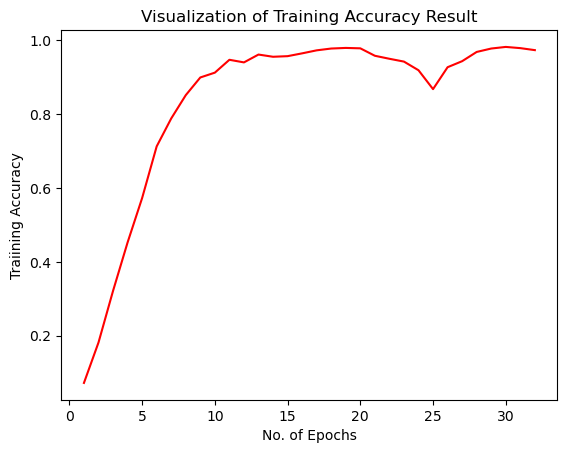

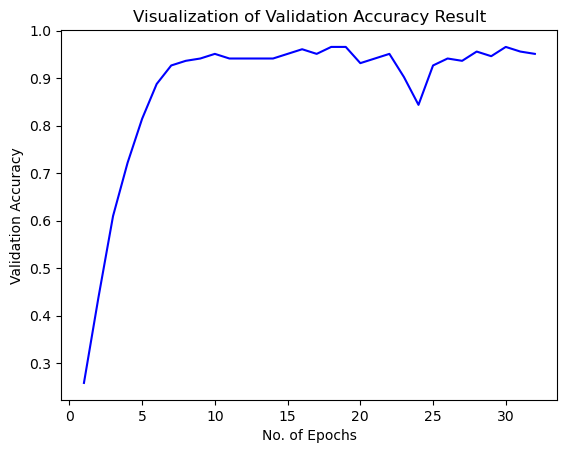

In [92]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history_vegetable1.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()
     

plt.plot(epochs,training_history_vegetable1.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

# Model accuracy testing on test images

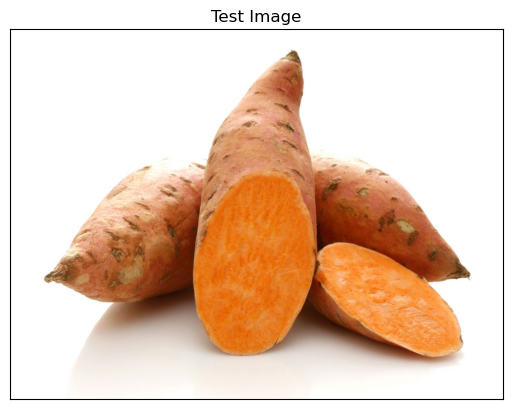

In [213]:
#Test Image Visualization
import cv2

image_path = '/Users/HP/Documents/IMGFORPRESENTATION/sweetpotatoes_getty2400-56a4975c5f9b58b7d0d7b790.jpg'

# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [214]:
# preprocess image then predict using the model
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions1 = cnn1.predict(input_arr)

1/1 [==============================] - 0s 17ms/step


In [215]:
# the highest number indicates the particular class is the correct type of vegetable
print(predictions1)

[[6.7657896e-10 1.9300823e-10 1.4463692e-15 3.0859760e-13 2.6298766e-13
  1.1100090e-11 5.5733224e-10 7.6672653e-12 7.3431167e-10 2.1794921e-09
  3.1074969e-11 8.6201758e-12 7.0988570e-08 1.5478738e-14 6.8697744e-08
  1.3747730e-11 4.7189874e-10 3.2697206e-13 1.5079135e-10 9.9999976e-01
  5.0716353e-10]]


In [216]:
#Single image Prediction
result_index = np.argmax(predictions1)
print("It's a {}".format(test_set.class_names[result_index]))

It's a sweetpotato


In [192]:
cnn1.save('CNN_Veggie.h5')